In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

In [4]:
iris=load_iris()
X=iris.data[:,:2]
y=iris.target

X=X[y!=2]
y=y[y!=2]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
clf_lr=LogisticRegression()
clf_lr.fit(X_train,y_train)
y_pred_lr=clf_lr.predict(X_test)

In [6]:
clf_nb=GaussianNB()
clf_nb.fit(X_train,y_train)
y_pred_nb=clf_nb.predict(X_test)

In [7]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
import matplotlib.pyplot as plt
def plot_decision_boundary(model,title):
    X_min,X_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.linspace(X_min,X_max,400),np.linspace(y_min,y_max,400))
    grid=np.c_[xx.ravel(),yy.ravel()]
    z=model.predict(grid)
    z=z.reshape(xx.shape)
    plt.figure(figsize=(6,5))
    plt.contour(xx,yy,z,level=[0.5],linewidths=2)
    plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k',s=35)
    plt.title(title)
    plt.xlabel('sepal length ')
    plt.ylabel('sepal width')
    plt.xlim(X_min,X_max)
    plt.ylim(y_min,y_max)
    plt.show()

C:\Users\shebi\AppData\Local\Temp\ipykernel_9868\13938805.py:10: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contour(xx,yy,z,level=[0.5],linewidths=2)


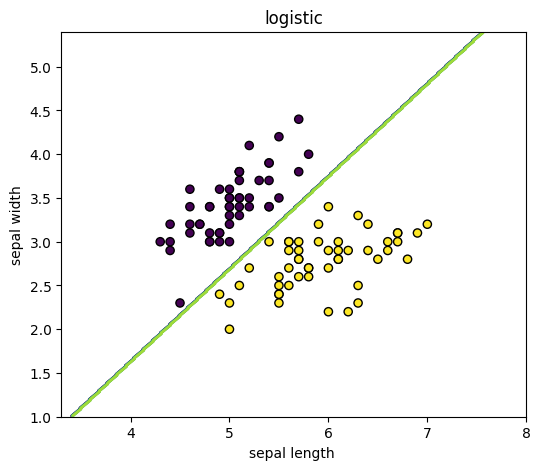

C:\Users\shebi\AppData\Local\Temp\ipykernel_9868\13938805.py:10: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contour(xx,yy,z,level=[0.5],linewidths=2)


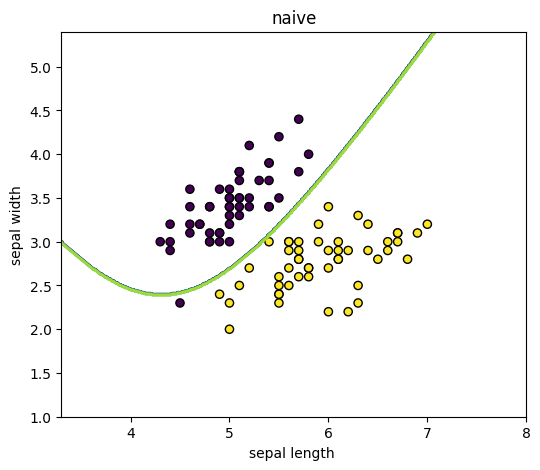

In [10]:
plot_decision_boundary(clf_lr,'logistic')
plot_decision_boundary(clf_nb,'naive')

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Naive bayes custom


In [19]:
from collections import Counter

class NBcustom:
    def __init__(self):
        self.means={}
        self.stds={}
        self.priors={}
    def mygaussian(self,x,mu,sig):
        lhd=1/(sig*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2))
        return lhd
    def fit(self,data,label):
        label = np.array(label)

        data=np.array(data)
        
        self.classes=np.unique(label)
        for c in self.classes:
            x_c=data[label==c]
            self.means[c]=x_c.mean(axis=0)
            self.stds[c]=x_c.std(axis=0,ddof=1)
            self.priors[c]=x_c.shape[0]/data.shape[0]
    def predict_one(self,X):
        posteriors={}
        for c in self.classes:
            prior=np.log(self.priors[c])
            likelihoods=np.sum(np.log(self.mygaussian(X,self.means[c],self.stds[c])))
            posteriors[c]=prior+likelihoods
        return max(posteriors,key=posteriors.get)
    def predict(self,X):
        X=np.array(X)
        return np.array([self.predict_one(x) for x in X])


In [20]:
mod=NBcustom()
mod.fit(X_train,y_train)
y_pred_nb_cus=mod.predict(X_test)
y_pred_nb_cus

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

C:\Users\shebi\AppData\Local\Temp\ipykernel_9868\13938805.py:10: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contour(xx,yy,z,level=[0.5],linewidths=2)


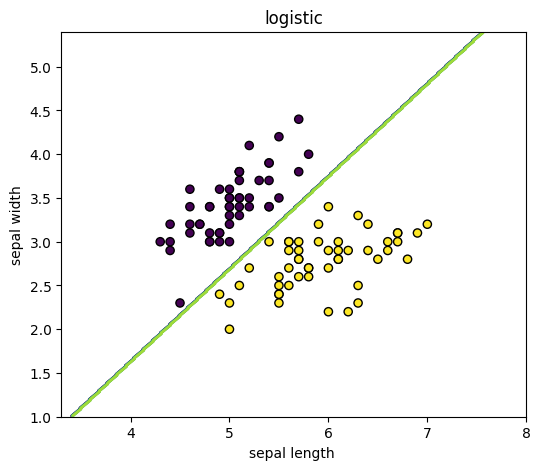

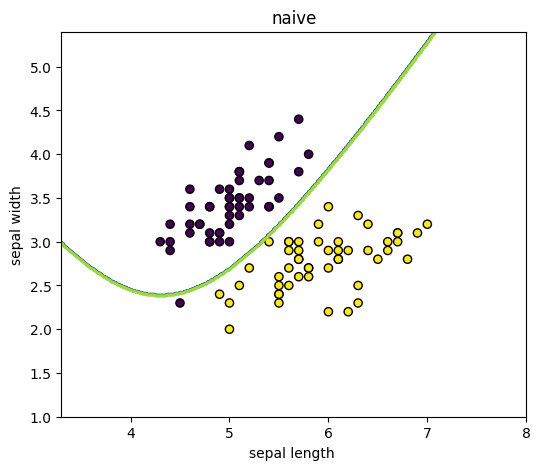

In [21]:
plot_decision_boundary(clf_lr,'logistic')
plot_decision_boundary(mod,'naive')

In [ ]:
print(classification_report(y_pred_nb_cus,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

